# 波士顿房价分析可视化及回归预测

### 文档介绍


该ipynd文件是利波士顿房价数据集来训练自定义的"LinearRegression.py"文件中的多元线性回归模型及数据分析的相关函数

### 波士顿房价数据集的背景和来源

数据集有以下这些内容

- CRIM--城镇人均犯罪率
- ZN - 占地面积超过25,000平方英尺的住宅用地比例。
- INDUS - 每个城镇非零售业务的比例。
- CHAS - Charles River虚拟变量（如果是河道，则为1;否则为0）
- NOX - 一氧化氮浓度（每千万份）
- RM - 每间住宅的平均房间数
- AGE - 1940年以前建造的自住单位比例
- DIS - 加权距离波士顿的五个就业中心
- RAD - 径向高速公路的可达性指数
- TAX - 每10,000美元的全额物业税率
- PTRATIO - 城镇的学生与教师比例
- B - 1000（Bk - 0.63）^ 2其中Bk是城镇黑人的比例
- LSTAT - 人口状况下降％
- MEDV - 自有住房的中位数报价, 单位1000美元

## 数据预处理

### 1.导入数据集

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


raw_data = np.fromfile('.\housing.data',sep=' ') # 读取用空格分割的data文件
title = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'] # data文件不带名称栏 
columns_number = len(title)
    

展示数据集的基本信息

In [25]:
print(np.shape(raw_data))
print(len(raw_data) // columns_number)

(7084,)
506


### 2.数据格式适应变化

由于是data文件,由空格分割,所以接下来按规定的不同列来构建一个506*14的二维数组,当然,构建一个DataFrame也可以

In [26]:
Boston = raw_data.reshape([len(raw_data) // columns_number,columns_number])

### 3.划分数据集

In [27]:
rate = 0.8 # 设置训练集所占的比例

In [28]:
devide_index = int(Boston.shape[0]*rate)
Train_data_label = Boston[:devide_index]
print("训练集包括目标集的大小为:{}".format(Train_data_label.shape))

训练集包括目标集的大小为:(404, 14)


In [29]:
Train_data = Train_data_label[:,0:13] # 真正的训练集,取前13列
Train_label = Train_data_label[:,13:14] # 用来训练的目标值
Train_label.shape[1]

1

### 4.数据归一化

为什么需要进行数据归一化,简而言之,当出现过度拟合时,我们可以有两种方法对他进行处理

- 通过人工选择或模型方法来舍弃一些特征,从而达到降维的效果
- 进行归一化处理,保留特征,但降低不同特征参数之间的大小差异

而进行归一化有着有力的理由:

![CSDN郝草草的回答](https://s2.loli.net/2022/04/01/hsoLaV8jygmwbeU.png)

下面我们来判断是否要进行过拟合处理

=我们可以通过计算各特征值和目标值单独的相关性来达到判断的目的=

In [30]:
Boston_DataFrame = pd.DataFrame(Boston,columns=title)  # 将Boston转换为DataFrame,从而可以使用pandas库的corr函数进行相关性的计算

数据基本情况的展示,可以通过肉眼初步判断,但十分不建议这样做!

In [31]:
Boston_DataFrame.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  

下面为各个特征值之间的相关性表

In [32]:
Boston_DataFrame.corr()  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### 下面进行可视化操作

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

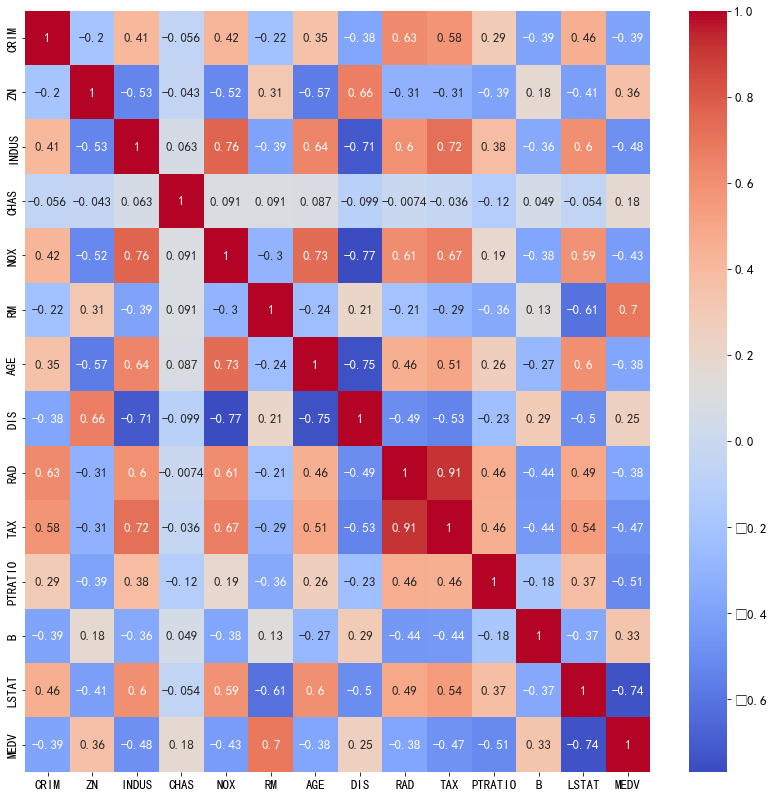

In [33]:
plt.figure(figsize=(14,14))
sns.heatmap(Boston_DataFrame.corr(),annot=True,cmap="coolwarm")

#### 热力图分析:

由于corr函数展示的是所有特征值之间的相关性,而我们需要的只是前13个特征值和第14个目标值之间的相关性,所以我们只需要观察最后一列的颜色状况

从图例可以看出,颜色越接近图例的上方(棕色)和下方(深蓝)表示特征值之间的相关性越高,颜色越浅则表示越不相关

同时,从数值我们也可以得出,相关性的绝对值大于0.5的仅有三项,分别为"LSTAT","PTRAPIO","RM"

*总结* :大部分的特征值和房价的相关性并不大,存在过拟合的可能性,需要进行数据处理操作 

**由于有效的特征值并不多,所以可以采用降维的操作,但我选择的是归一化处理,如下:**

In [34]:
maximum = Train_data_label.max(axis=0)
minimum = Train_data_label.min(axis=0)
average = Train_data_label.sum(axis=0) / Train_data.shape[0]
# 进行归一化操作
for i in range(columns_number):
    Boston[:,i] = (Boston[:,i] - average[i])/(maximum[i]-minimum[i])  # 即每一列中的每一个数都减去该列的平均值再除以该列的极差
Train_data_label = Boston[:devide_index] # 再设置包括目标值的测试集
Test_data_label = Boston[devide_index:]  

In [35]:
Train_data = Train_data_label[:,0:13] # 再设置真正的训练集,取前13列
Train_label = Train_data_label[:,13:14] # 重置用来训练的目标值
Test_data = Test_data_label[:,0:13]
Test_label = Test_data_label[:,13:14] 

## 调用模型

### 1.模型训练

In [36]:
from LinearRegression import *
lr = LRegression()

In [37]:
lr.Fit(Train_data,Train_label)

LRegression()

In [38]:
print("{}".format(lr.weight))
print("截距:{}".format(lr.intercept))
print(lr.weight.shape)

[[-0.3996434 ]
 [ 0.09806141]
 [ 0.0294857 ]
 [ 0.04188318]
 [-0.16122401]
 [ 0.55209907]
 [ 0.00623025]
 [-0.31775   ]
 [ 0.23596055]
 [-0.16545157]
 [-0.16954098]
 [-0.01428857]
 [-0.42865754]]
截距:[3.33934269e-16]
(13, 1)


### 2.模型预测

In [39]:
# print(Test_data.shape[0])
Test_predict = lr.Predict(Test_data)  # Text_predict即训练后的模型对测试集产生的结果

### 3.误差分析

毫无疑问,预测值和实际值之间会存在偏差,所以我们引入误差函数这一概念,我们也由此外推出衡量模型好坏的数学方法

#### 利用决定系数来量化模型的表现

In [40]:
R_2 = lr.score(Test_data,Test_label)

In [41]:
print("{}".format(R_2))

-0.21985315040423092


绘图

2 <class 'numpy.ndarray'>


D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


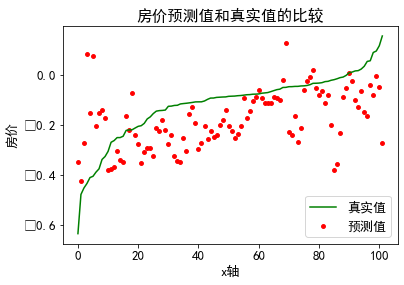

In [42]:
plt.rc('font',family='SimHei',size=13)
plt.figure()
X = np.arange(0,len(Test_label))     # 获取X,Y并进行排序
res = np.argsort(Test_predict)
Y = [Test_label[i] for i in res]
Test_predict.sort(axis = 0)
print(2,type(Test_predict))
plt.scatter(X,Test_label,c='red',s=60,marker='.')
plt.plot(X,Test_predict,c='green')
plt.title("房价预测值和真实值的比较")
plt.xlabel('x轴')
plt.ylabel('房价')
plt.legend(['真实值','预测值'])
plt.show()

**误差分析:**

从图像可以看出,预测值在前一部分的特征值中偏小而在后一部分中偏大,能大致接近真实值,但并不精准

该模型的决定系数较小,有几种可能的原因:

- 模型逻辑有错,算法出了问题(这个本人经过了测试和改写,应该没有问题)


- 模型没有问题,但由于训练集的数量太少,不能很好的训练模型,出现了欠拟合的问题

- 该模型模型本身精度不高(个人认为这一点可性最高)

--但从另一方面来说:--

由于对目标值,即房价也进行了归一化处理,所以预测出来的目标值始终是在0的附近的,本身就存在误差的问题,所以还有可能是归一化过程不准确

**模型改进方法**


可以有以下方法来对模型进行改进:

- 改用梯度下降法

- 增加数据数量

- 换用合适模型,树等